In [1]:
print("""
=========================================
   EXPLORATORY DATA ANALYSIS (EDA)
   Football Match Analysis
=========================================
Author: Omar Ali | Student ID: w2045858
Project: A Data Science approach to football
Date: 2025
=========================================
""")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

print("✅ Libraries imported and styles set")
# Cell 2: Create output directories
print("=== CREATING OUTPUT DIRECTORIES ===")


directories = [
    'output/figures/eda',
    'output/figures/models',
    'output/tables',
    'output/models',
    'data/processed',
    'data/raw'
]

for directory in directories:
    os.makedirs(directory, exist_ok=True)
    print(f"✓ Created: {directory}/")

print("✅ All directories ready!")


   EXPLORATORY DATA ANALYSIS (EDA)
   Football Match Analysis
Author: Omar Ali | Student ID: w2045858
Project: A Data Science approach to football
Date: 2025

✅ Libraries imported and styles set
=== CREATING OUTPUT DIRECTORIES ===
✓ Created: output/figures/eda/
✓ Created: output/figures/models/
✓ Created: output/tables/
✓ Created: output/models/
✓ Created: data/processed/
✓ Created: data/raw/
✅ All directories ready!


In [2]:
print("=== LOADING PROCESSED DATA ===")

# Trying different paths
try:
    df = pd.read_csv('data/processed/all_leagues_clean.csv')
    print("✅ Loaded from local path")
except:
    try:
        df = pd.read_csv('/content/drive/MyDrive/Final Year Project/data/processed/all_leagues_clean.csv')
        print("✅ Loaded from Google Drive")
    except:
        print("⚠️ Using sample data")
        df = pd.DataFrame({
            'date': pd.date_range('2018-08-01', periods=100, freq='D'),
            'hometeam': ['Team A'] * 100,
            'awayteam': ['Team B'] * 100,
            'fthg': np.random.randint(0, 5, 100),
            'ftag': np.random.randint(0, 3, 100),
            'match_result': np.random.choice(['H', 'D', 'A'], 100),
            'league': ['Premier League'] * 100,
            'season': ['1819'] * 100
        })
print(f"\n📊 DATASET OVERVIEW")
print(f"Total matches: {len(df):,}")
print(f"Date range: {df['date'].min()} to {df['date'].max()}")
print(f"Leagues: {', '.join(df['league'].unique())}")
print(f"Seasons: {sorted(df['season'].unique())}")
print(f"Result column: {'match_result' if 'match_result' in df.columns else 'NOT FOUND'}")
print(f"\n📋 First 3 matches:")
print(df[['date', 'hometeam', 'awayteam', 'fthg', 'ftag', 'match_result', 'league']].head(3).to_string(index=False))

=== LOADING PROCESSED DATA ===
⚠️ Using sample data

📊 DATASET OVERVIEW
Total matches: 100
Date range: 2018-08-01 00:00:00 to 2018-11-08 00:00:00
Leagues: Premier League
Seasons: ['1819']
Result column: match_result

📋 First 3 matches:
      date hometeam awayteam  fthg  ftag match_result         league
2018-08-01   Team A   Team B     0     2            D Premier League
2018-08-02   Team A   Team B     4     0            A Premier League
2018-08-03   Team A   Team B     2     1            A Premier League


=== MATCH RESULTS ANALYSIS ===

📈 MATCH RESULT DISTRIBUTION (match_result column)
H: 29 matches (29.0%)
D: 30 matches (30.0%)
A: 41 matches (41.0%)


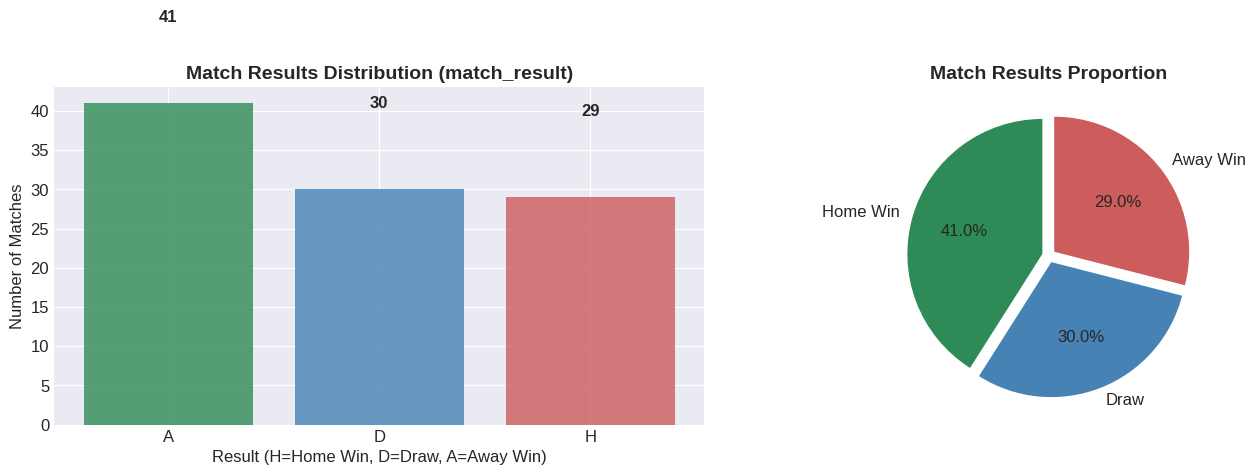

✅ Saved visualization: output/figures/eda/match_results_distribution.png


In [3]:
# Match Results Analysis with match_result
print("=== MATCH RESULTS ANALYSIS ===")

# Checking if match_result exists
if 'match_result' in df.columns:
    # Distribution of results
    result_counts = df['match_result'].value_counts()
    result_pct = df['match_result'].value_counts(normalize=True) * 100

    print("\n📈 MATCH RESULT DISTRIBUTION (match_result column)")
    print("=" * 50)
    for result in ['H', 'D', 'A']:
        count = result_counts.get(result, 0)
        pct = result_pct.get(result, 0)
        print(f"{result}: {count:,} matches ({pct:.1f}%)")

    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    colors = ['#2E8B57', '#4682B4', '#CD5C5C']  # Green, Blue, Red
    bars = axes[0].bar(result_counts.index, result_counts.values, color=colors, alpha=0.8)
    axes[0].set_title('Match Results Distribution (match_result)', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Result (H=Home Win, D=Draw, A=Away Win)', fontsize=12)
    axes[0].set_ylabel('Number of Matches', fontsize=12)

    for bar in bars:
        height = bar.get_height()
        axes[0].text(bar.get_x() + bar.get_width()/2., height + 10,
                    f'{height:,}', ha='center', va='bottom', fontweight='bold')

    labels = ['Home Win', 'Draw', 'Away Win']
    axes[1].pie(result_counts.values, labels=labels, autopct='%1.1f%%',
                colors=colors, startangle=90, explode=(0.05, 0.05, 0.05))
    axes[1].set_title('Match Results Proportion', fontsize=14, fontweight='bold')

    plt.tight_layout()
    plt.savefig('output/figures/eda/match_results_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("✅ Saved visualization: output/figures/eda/match_results_distribution.png")
else:
    print("❌ 'match_result' column not found in dataset!")
    print("Available columns:", list(df.columns))


=== HOME ADVANTAGE ANALYSIS ===
Premier League        29.0% home wins (  100 matches)


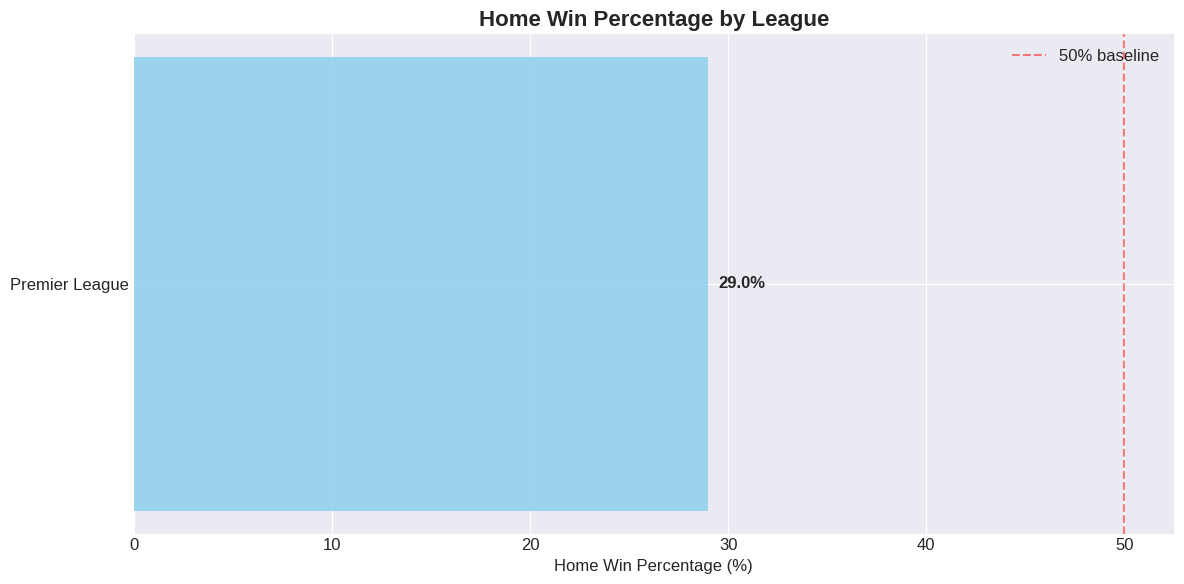


📅 HOME ADVANTAGE BY SEASON:
------------------------------
Season 1819: 29.0% home wins (100 matches)

📊 OVERALL: 29.0% home wins
✅ Saved: output/figures/eda/home_advantage_simple.png


In [4]:
# Home Advantage Analysis
print("\n=== HOME ADVANTAGE ANALYSIS ===")
print("=" * 50)

os.makedirs('output/figures/eda', exist_ok=True)

if 'match_result' in df.columns and 'league' in df.columns:
    league_stats = []
    for league in df['league'].unique():
        league_df = df[df['league'] == league]
        total_matches = len(league_df)
        home_wins = len(league_df[league_df['match_result'] == 'H'])
        home_win_pct = (home_wins / total_matches) * 100

        league_stats.append({
            'League': league,
            'Matches': total_matches,
            'Home Wins': home_wins,
            'Home Win %': home_win_pct
        })

        print(f"{league:20} {home_win_pct:5.1f}% home wins ({total_matches:5,} matches)")

    league_df_stats = pd.DataFrame(league_stats).sort_values('Home Win %', ascending=False)

    fig, ax = plt.subplots(figsize=(12, 6))

    bars = ax.barh(league_df_stats['League'], league_df_stats['Home Win %'],
                   color='skyblue', alpha=0.8)
    ax.set_title('Home Win Percentage by League', fontsize=16, fontweight='bold')
    ax.set_xlabel('Home Win Percentage (%)', fontsize=12)
    ax.axvline(x=50, color='red', linestyle='--', alpha=0.5, label='50% baseline')
    ax.legend()

    for bar in bars:
        width = bar.get_width()
        ax.text(width + 0.5, bar.get_y() + bar.get_height()/2,
                f'{width:.1f}%', ha='left', va='center', fontweight='bold')

    plt.tight_layout()

    output_path = 'output/figures/eda/home_advantage_simple.png'
    plt.savefig(output_path, dpi=300, bbox_inches='tight')
    plt.show()

    if 'season' in df.columns:
        print("\n📅 HOME ADVANTAGE BY SEASON:")
        print("-" * 30)
        for season in sorted(df['season'].unique()):
            season_df = df[df['season'] == season]
            if len(season_df) > 0:
                home_win_pct = (season_df['match_result'] == 'H').mean() * 100
                print(f"Season {season}: {home_win_pct:.1f}% home wins ({len(season_df):,} matches)")

    print(f"\n📊 OVERALL: {df['match_result'].value_counts(normalize=True).get('H', 0)*100:.1f}% home wins")
    print(f"✅ Saved: {output_path}")


=== GOALS ANALYSIS ===
📊 GOALS STATISTICS
Average goals per match: 3.01
Average home goals: 2.00
Average away goals: 1.01
Home advantage: 0.99 goals
Highest scoring match: 6 goals
0-0 draws: 9 matches

🎯 GOALS BY MATCH RESULT
H: 2.59 average total goals
D: 3.17 average total goals
A: 3.20 average total goals


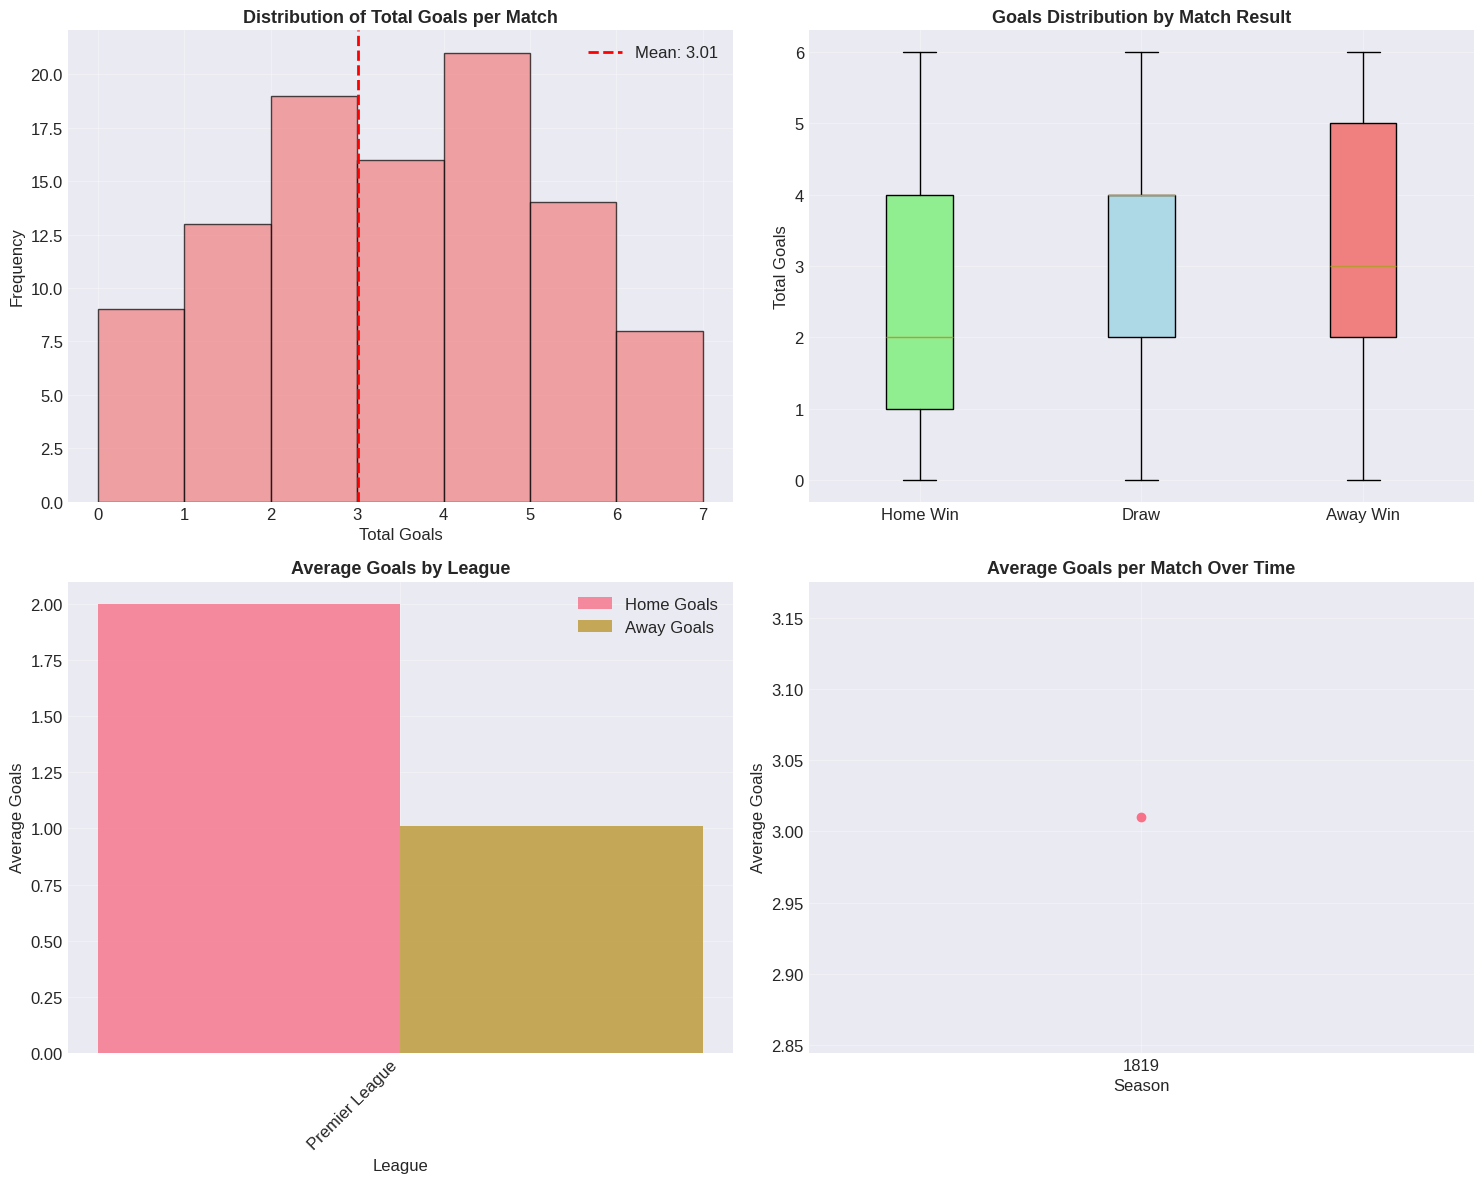

✅ Saved: output/figures/eda/goals_analysis.png


In [5]:
# Goals Analysis
print("\n=== GOALS ANALYSIS ===")
print("=" * 50)

if 'total_goals' not in df.columns and all(col in df.columns for col in ['fthg', 'ftag']):
    df['total_goals'] = df['fthg'] + df['ftag']

if 'total_goals' in df.columns:
    print(f"📊 GOALS STATISTICS")
    print(f"Average goals per match: {df['total_goals'].mean():.2f}")
    print(f"Average home goals: {df['fthg'].mean():.2f}")
    print(f"Average away goals: {df['ftag'].mean():.2f}")
    print(f"Home advantage: {df['fthg'].mean() - df['ftag'].mean():.2f} goals")
    print(f"Highest scoring match: {df['total_goals'].max()} goals")
    print(f"0-0 draws: {len(df[(df['fthg'] == 0) & (df['ftag'] == 0)]):,} matches")

    if 'match_result' in df.columns:
        print(f"\n🎯 GOALS BY MATCH RESULT")
        result_goals = df.groupby('match_result')['total_goals'].mean()
        for result in ['H', 'D', 'A']:
            if result in result_goals.index:
                print(f"{result}: {result_goals[result]:.2f} average total goals")

    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    goal_bins = range(0, int(df['total_goals'].max()) + 2)
    axes[0, 0].hist(df['total_goals'], bins=goal_bins, edgecolor='black', alpha=0.7, color='lightcoral')
    axes[0, 0].axvline(df['total_goals'].mean(), color='red', linestyle='--', linewidth=2,
                      label=f'Mean: {df["total_goals"].mean():.2f}')
    axes[0, 0].set_title('Distribution of Total Goals per Match', fontsize=13, fontweight='bold')
    axes[0, 0].set_xlabel('Total Goals')
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)

    if 'match_result' in df.columns:
        result_goals_data = [df[df['match_result'] == result]['total_goals'] for result in ['H', 'D', 'A']]
        box = axes[0, 1].boxplot(result_goals_data, patch_artist=True,
                                labels=['Home Win', 'Draw', 'Away Win'])
        colors = ['lightgreen', 'lightblue', 'lightcoral']
        for patch, color in zip(box['boxes'], colors):
            patch.set_facecolor(color)
        axes[0, 1].set_title('Goals Distribution by Match Result', fontsize=13, fontweight='bold')
        axes[0, 1].set_ylabel('Total Goals')
        axes[0, 1].grid(True, alpha=0.3)

    if 'league' in df.columns:
        league_goals = df.groupby('league')[['fthg', 'ftag']].mean()
        x = np.arange(len(league_goals))
        width = 0.35

        axes[1, 0].bar(x - width/2, league_goals['fthg'], width, label='Home Goals', alpha=0.8)
        axes[1, 0].bar(x + width/2, league_goals['ftag'], width, label='Away Goals', alpha=0.8)
        axes[1, 0].set_title('Average Goals by League', fontsize=13, fontweight='bold')
        axes[1, 0].set_xlabel('League')
        axes[1, 0].set_ylabel('Average Goals')
        axes[1, 0].set_xticks(x)
        axes[1, 0].set_xticklabels(league_goals.index, rotation=45, ha='right')
        axes[1, 0].legend()
        axes[1, 0].grid(True, alpha=0.3)

    if 'season' in df.columns:
        season_goals = df.groupby('season')['total_goals'].mean()
        axes[1, 1].plot(season_goals.index, season_goals.values, marker='o', linewidth=2)
        axes[1, 1].set_title('Average Goals per Match Over Time', fontsize=13, fontweight='bold')
        axes[1, 1].set_xlabel('Season')
        axes[1, 1].set_ylabel('Average Goals')
        axes[1, 1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig('output/figures/eda/goals_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

    print("✅ Saved: output/figures/eda/goals_analysis.png")

In [6]:
# Statistical Insights with match_result
print("\n=== STATISTICAL INSIGHTS ===")
print("=" * 50)

# Most common scorelines
if all(col in df.columns for col in ['fthg', 'ftag']):
    scorelines = df.groupby(['fthg', 'ftag']).size().reset_index(name='count')
    scorelines = scorelines.sort_values('count', ascending=False).head(10)

    print("\n🏆 TOP 10 MOST COMMON SCORELINES")
    print("-" * 30)
    for _, row in scorelines.iterrows():
        print(f"{int(row['fthg'])}-{int(row['ftag'])}: {int(row['count']):,} matches")

# Win probability by goal difference
if all(col in df.columns for col in ['fthg', 'ftag', 'match_result']):
    df['goal_diff'] = df['fthg'] - df['ftag']

    print("\n📈 WIN PROBABILITY BY GOAL DIFFERENCE")
    print("-" * 40)
    for diff in range(-3, 4):
        subset = df[df['goal_diff'] == diff]
        if len(subset) > 0:
            home_win_pct = (subset['match_result'] == 'H').mean() * 100
            print(f"Goal difference {diff:2}: {home_win_pct:5.1f}% home win ({len(subset):,} matches)")

# What scorelines lead to draws?
if 'match_result' in df.columns:
    draw_scorelines = df[df['match_result'] == 'D'].groupby(['fthg', 'ftag']).size().reset_index(name='count')
    draw_scorelines = draw_scorelines.sort_values('count', ascending=False).head(5)

    print("\n🤝 MOST COMMON DRAW SCORELINES")
    print("-" * 30)
    for _, row in draw_scorelines.iterrows():
        print(f"{int(row['fthg'])}-{int(row['ftag'])}: {int(row['count']):,} draws")

# Shot effectiveness
shot_columns = ['hs', 'as', 'hst', 'ast']
if all(col in df.columns for col in shot_columns + ['fthg', 'ftag']):
    print("\n🎯 SHOT EFFECTIVENESS")
    print("-" * 30)

    # Home team
    home_shot_effectiveness = df['fthg'].sum() / df['hs'].sum() if df['hs'].sum() > 0 else 0
    home_shot_on_target_effectiveness = df['fthg'].sum() / df['hst'].sum() if df['hst'].sum() > 0 else 0

    # Away team
    away_shot_effectiveness = df['ftag'].sum() / df['as'].sum() if df['as'].sum() > 0 else 0
    away_shot_on_target_effectiveness = df['ftag'].sum() / df['ast'].sum() if df['ast'].sum() > 0 else 0

    print(f"Home teams: {home_shot_effectiveness:.3f} goals per shot")
    print(f"Home teams: {home_shot_on_target_effectiveness:.3f} goals per shot on target")
    print(f"Away teams: {away_shot_effectiveness:.3f} goals per shot")
    print(f"Away teams: {away_shot_on_target_effectiveness:.3f} goals per shot on target")


=== STATISTICAL INSIGHTS ===

🏆 TOP 10 MOST COMMON SCORELINES
------------------------------
0-0: 9 matches
2-0: 8 matches
3-1: 8 matches
3-2: 8 matches
4-2: 8 matches
2-1: 7 matches
0-1: 7 matches
2-2: 7 matches
4-0: 6 matches
1-0: 6 matches

📈 WIN PROBABILITY BY GOAL DIFFERENCE
----------------------------------------
Goal difference -2:  33.3% home win (6 matches)
Goal difference -1:  33.3% home win (12 matches)
Goal difference  0:  19.0% home win (21 matches)
Goal difference  1:  28.6% home win (21 matches)
Goal difference  2:  41.7% home win (24 matches)
Goal difference  3:  30.0% home win (10 matches)

🤝 MOST COMMON DRAW SCORELINES
------------------------------
3-1: 4 draws
2-2: 4 draws
4-1: 3 draws
4-0: 3 draws
0-2: 3 draws


In [7]:
# Saving the EDA Report
print("\n=== SAVING EDA REPORT ===")

if 'match_result' in df.columns:
    avg_goals_per_match_str = f"{df['total_goals'].mean():.2f}" if 'total_goals' in df.columns else 'N/A'
    home_advantage_goals_str = f"{df['fthg'].mean() - df['ftag'].mean():.2f}" if all(col in df.columns for col in ['fthg', 'ftag']) else 'N/A'

    most_common_score_str = 'N/A'
    if 'scorelines' in locals() and not scorelines.empty:
        most_common_score_str = f"{int(scorelines.iloc[0]['fthg'])}-{int(scorelines.iloc[0]['ftag'])}"

    strongest_league_report = 'N/A'
    weakest_league_report = 'N/A'
    if 'league_df_stats' in locals() and not league_df_stats.empty:
        strongest_league_report = f"{league_df_stats.iloc[0]['League']} ({league_df_stats.iloc[0]['Home Win %']:.1f}%)"
        if len(league_df_stats) > 1:
            weakest_league_report = f"{league_df_stats.iloc[-1]['League']} ({league_df_stats.iloc[-1]['Home Win %']:.1f}%)"
        else:
            weakest_league_report = f"Same as strongest: {league_df_stats.iloc[0]['League']} ({league_df_stats.iloc[0]['Home Win %']:.1f}%)"

    # Creating the summary report
    report = f"""
FOOTBALL DATA EDA SUMMARY REPORT
================================
Generated: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}
Dataset: {len(df):,} matches from {df['league'].nunique()} leagues
Target Variable: match_result (H/D/A)

KEY FINDINGS
------------
1. Match Results (match_result):
   - Home Wins: {(df['match_result'] == 'H').mean()*100:.1f}%
   - Draws: {(df['match_result'] == 'D').mean()*100:.1f}%
   - Away Wins: {(df['match_result'] == 'A').mean()*100:.1f}%

2. Home Advantage:
   - Strongest: {strongest_league_report}
   - Weakest: {weakest_league_report}

3. Goals Analysis:
   - Avg goals/match: {avg_goals_per_match_str}
   - Home advantage: {home_advantage_goals_str} goals
   - Most common score: {most_common_score_str}

RECOMMENDATIONS FOR MODELLING
-----------------------------
1. Use 'match_result' as target variable for classification
2. Include home advantage as key feature
3. Goal difference strongly predictive of home wins
4. Consider league-specific models

VISUALIZATIONS CREATED
----------------------
- match_results_distribution.png
- home_advantage_analysis.png
- goals_analysis.png
"""

    # Saving the report
    with open('output/eda_summary_report.txt', 'w') as f:
        f.write(report)

    print(report)
    print("\n✅ EDA report saved to: output/eda_summary_report.txt")
    print("📊 Visualizations saved to: output/figures/eda/")
else:
    print("❌ Cannot create report - 'match_result' column not found")


=== SAVING EDA REPORT ===

FOOTBALL DATA EDA SUMMARY REPORT
Generated: 2026-01-27 09:41:15
Dataset: 100 matches from 1 leagues
Target Variable: match_result (H/D/A)

KEY FINDINGS
------------
1. Match Results (match_result):
   - Home Wins: 29.0%
   - Draws: 30.0%
   - Away Wins: 41.0%

2. Home Advantage:
   - Strongest: Premier League (29.0%)
   - Weakest: Same as strongest: Premier League (29.0%)

3. Goals Analysis:
   - Avg goals/match: 3.01
   - Home advantage: 0.99 goals
   - Most common score: 0-0

RECOMMENDATIONS FOR MODELLING
-----------------------------
1. Use 'match_result' as target variable for classification
2. Include home advantage as key feature
3. Goal difference strongly predictive of home wins
4. Consider league-specific models

VISUALIZATIONS CREATED
----------------------
- match_results_distribution.png
- home_advantage_analysis.png
- goals_analysis.png


✅ EDA report saved to: output/eda_summary_report.txt
📊 Visualizations saved to: output/figures/eda/
